# Questions and Answers

**1) What are the categorical differences in viewing patterns between Germans and Indians?**

According to the analysis of the behaviours of Indians and German people, there are a lot of differences. It could be found out by distribution and difference in absolute and percentage ratios. Also, it should take into account how many likes has the category.
- The biggest difference is in the categories `Music`, `People & Blogs` and `Sport`. These categories have big enough weight and can be classified as remarkable. 
`Music` is the top category with the biggest difference. Indians trending videos have more views at 2 times with a delta of 1,1 billion views.
The second difference is the category `People & Blogs` with a difference of 771 million views.
The third is `Sport` - the difference is 706 million views
- Other categories have fewer likes or in other words less weight. But some categories seem to be interesting. For example, `Gaming` by 9.8 times more popular in Germany than in India. `Autos & Vehicles` by 12.3 times.
- ` Travel & Events`, `Pets & Animals` and `Other` are the least trendy categories with the biggest differences. They differ by almost 19 times each between Germans and Indians.
- `Autos & Vehicles` is higher by 11.5 times. 
- Indians and Germans show similar behaviour in categories: `Howto & Style`, `Education` and `Shows`.

------------------------------------------------------------------
 
**2) Ratios between views / likes / dislikes for different categories / countries. It seems to me that the Mexicans like all videos and the British are unhappy again. Is it easier for musicians to collect likes than for politicians?**

**The plot with colour fill shows that Russia has the highest ratio of likes, dislikes and comments to views. So, Russia is the most involved country. On the other side, there is Japan with the lowest likes/views ratio and India with the lowest comment/views ratio. It seems to me that it is wrong to consider Great Britain as an unhappy country. It looks like GB is one of the not involved countries. British does not like to press a button ‘like’, ‘dislike’ and write comments. But they are not in the first position of not being involved countries.
Mexicans are in the second position with the second likes/views ratio after Russia. But considering likes/dislikes ratio Mexicans are in the second position after Korea. Koreans seem to have the highest likes/dislikes ratio.**


**Likes distribution shows that**:
- `Other` category is the most popular for about a half countries.
- Category `Movies` is absent in trends in CA, GB, JP, KR, MX and US.
- `Nonprofits & Activism` is in trending video in US only but no `Movie`, `Other` and `Trailers` categories. 
- `Trailers` is in France only.
- Japan has not `Shows`


**Dislikes distribution shows that**:
- `Other` category has the highest dislike ratio for DE, GB, RU.
- Russia is very involved in `News & Politics`.
- US has the top dislike category `Nonprofit & activism` because US only has the trending videos in this category.
- It seems that Russia is the country with the highest dislike ratio. RU has the most disliked among other countries in categories: `Comedy`, `Music`, `News & Politics`, `Other`, `People & Blogs`.


**Yes, it is easier for musicians to collect likes than for politicians. `Music` category has more likes than `News & Politics` for all countries except Great Britain. GB has more likes/views ratio in `News & Politics` than in `Music` category.**

------------------------------------------------------------------

**3) Сhannels that are popular in most countries. Ed Sheeran, hello.**

`Ed Sheeran` with 3.7 billion trending views at 10-the position, whereas ` NickyJamTV` has 8.6 billion.

If popularity is measured by other metrics, the distribution is slightly different, but `by likes` Ed Sheeran is again at the 10-th place.

The `Likes + dislike` measure provides similar results.

By `comment_count` he is at the 25-th place.

------------------------------------------------------------------

_**All answers from above are also provided by the code below.**_

## About Dataset

**Context**

YouTube (the world-famous video sharing website) maintains a list of the [top trending videos](https://www.youtube.com/feed/trending) on the platform. [According to Variety magazine](http://variety.com/2017/digital/news/youtube-2017-top-trending-videos-music-videos-1202631416/), “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset is a daily record of the top trending YouTube videos.

Note that this dataset is a structurally improved version of this [dataset](https://www.kaggle.com/datasnaek/youtube).

**Content**

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day.

EDIT: Now includes data from RU, MX, KR, JP and IN regions (Russia, Mexico, South Korea, Japan and India respectively) over the same time period.

Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.

The data also includes a `category_id field`, which varies between regions. To retrieve the categories for a specific video, find it in the associated `JSON`. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the [column metadata](https://www.kaggle.com/datasnaek/youtube-new/data).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import datetime
from glob import glob
import pycountry
import json
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings("ignore")

# Data load

In [2]:
countries=  ["GB", "MX",  "KR", "DE", "FR", "US", "IN", "RU", "JP", "CA" ]

for file in glob('..\..\data\youtube-new\*.csv'):
    print(file.split('\\')[4][:2], 
          " - ", 
          pycountry.countries.get(alpha_2=file.split('\\')[4][:2]).name)

CA  -  Canada
DE  -  Germany
FR  -  France
GB  -  United Kingdom
IN  -  India
JP  -  Japan
KR  -  Korea, Republic of
MX  -  Mexico
RU  -  Russian Federation
US  -  United States


In [3]:
# extracts category and category id from json string
def get_category_dict(json_string):
    category_dict = {}
    for items in range(len(json_string["items"])):
        category_dict[int(json_string["items"][items]["id"].strip())] = \
                                json_string["items"][items]["snippet"]["title"]
    return category_dict

# assigns category name to each category id in dataframe
def get_categories(cid_values,category_dict):
    category = []
    for cid in cid_values:
        if cid in category_dict:
            category.append(category_dict[cid])
        else:
            category.append("Other")
    return category

# modifies date from YY.DD.MM to YYYY-MM-DD
def transform_date(date_values):
    for item in range(len(date_values)):
        converted_time = time.strptime(date_values[item], '%y.%d.%m')
        date_values[item] = str(converted_time.tm_year) + \
        "-" + \
        str(converted_time.tm_mon) + \
        "-" + \
        str(converted_time.tm_mday)
    return date_values

In [4]:
df_ = pd.DataFrame()

for country in tqdm(["GB", "MX", "KR", "DE", "FR", "US", "IN", "RU", "JP", "CA"]):

    df = pd.read_csv(f"..\..\data\youtube-new\{country}videos.csv", encoding='latin')
    df_json = json.loads("".join(open(f'..\..\data\youtube-new\{country}_category_id.json',
                                      'r').readlines()))
    category_dict = get_category_dict(df_json)
    category = get_categories(df["category_id"].values, category_dict)
    country_code = [f'{country}'] * len(df)
    df["Category"] = category
    df["Country_code"] = country_code
    df["trending_date"] = transform_date(df["trending_date"].values)
    df_ = pd.concat([df_, df])

df_['trending_date'] = pd.to_datetime(df_['trending_date'], 
                                      format='%Y-%m-%d')
df_['publish_time'] = pd.to_datetime(df_['publish_time'], 
                                     format='%Y-%m-%dT%H:%M:%S.%f%z')

# drop duplicates to get rid of the trending video in different countries simultaneously
df_ = df_.drop_duplicates(subset=['video_id', 'trending_date'])

df_

  0%|          | 0/10 [00:00<?, ?it/s]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Category,Country_code
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10 07:38:29+00:00,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,GB
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment,GB
2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,GB
3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13 02:30:38+00:00,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports,GB
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13+00:00,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07+00:00,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,ð¨ NEW MERCH! http://amzn.to/annoyingorange ...,Entertainment,CA
40877,8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18+00:00,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,âº Retrouvez vos programmes prÃ©fÃ©rÃ©s : htt...,Entertainment,CA
40878,GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III â SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,2018-06-11 17:30:53+00:00,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,Gaming,CA
40879,lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05+00:00,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isnât talking so tough now. An...,News & Politics,CA


In [5]:
# count numbers of unique video for each country
video_id_unique = df_.value_counts(subset=['video_id', 'Country_code'])

# create DataFrame with counters, rename column, reset index
video_id_unique = pd.DataFrame(video_id_unique).rename(columns={0:'count'}).reset_index()

# merge original DataFrame with counters
df1 = pd.merge(df_, video_id_unique, on=['video_id', 'Country_code'], how='left')

# get dataframe with max trending date as last unique row
max_df = df1.groupby(['video_id', 'Country_code'])['trending_date'].transform(max)

# get rif of useless raws
df = df1.loc[df1['trending_date'] == max_df]
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Category,Country_code,count
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13+00:00,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics,GB,1
5,AumaWl0TNBo,2017-11-14,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11 17:00:00+00:00,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,âº HOW MY RELATIONSHIP STARTED!\nâº PB Merch...,Entertainment,GB,1
7,-N5eucPMTTc,2017-11-14,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10 19:19:43+00:00,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,People & Blogs,GB,1
22,fiusxyygqGk,2017-11-14,Marshmello - You & Me (Official Music Video),marshmello,10,2017-11-10 15:00:03+00:00,"selena gomez wolves|""alone marshmello""|""marshm...",3407008,207262,3167,13279,https://i.ytimg.com/vi/fiusxyygqGk/default.jpg,False,False,False,PURCHASE YOU & ME HERE â¶ https://smarturl.it...,Music,GB,1
90,sLJdBmAeB_U,2017-11-14,COME SHOPPING WITH ME AND TRY ON NEW CLOTHING ...,Inthefrow,26,2017-11-07 19:00:50+00:00,"Inthefrow|""In the frow""|""COME SHOPPING WITH ME...",87772,2617,86,192,https://i.ytimg.com/vi/sLJdBmAeB_U/default.jpg,False,False,False,COME SHOPPING WITH ME AND TRYING ON NEW CLOTHI...,Howto & Style,GB,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323725,sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07+00:00,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,ð¨ NEW MERCH! http://amzn.to/annoyingorange ...,Entertainment,CA,1
323726,8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18+00:00,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,âº Retrouvez vos programmes prÃ©fÃ©rÃ©s : htt...,Entertainment,CA,1
323727,GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III â SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,2018-06-11 17:30:53+00:00,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,Gaming,CA,1
323728,lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05+00:00,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isnât talking so tough now. An...,News & Politics,CA,1


In [6]:
df_[df_['video_id'] == '3s1rvMFUweQ']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Category,Country_code
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment,GB
424,3s1rvMFUweQ,2017-11-16,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1668922,33772,3077,3472,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment,GB
665,3s1rvMFUweQ,2017-11-17,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1776127,35741,3214,3585,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment,GB


In [7]:
df[df['video_id'] == '3s1rvMFUweQ']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Category,Country_code,count
665,3s1rvMFUweQ,2017-11-17,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1776127,35741,3214,3585,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment,GB,3


# Short data overview

In [8]:
round(df.describe().drop(["category_id"],axis=1), 1)

,views,likes,dislikes,comment_count,count
count,190388.0,190388.0,190388.0,190388.0,190388.0
mean,380805.5,10882.9,700.8,1405.8,1.7
std,2810477.2,56118.6,7762.7,8804.1,2.2
min,153.0,0.0,0.0,0.0,1.0
25%,22246.0,325.0,20.0,52.0,1.0
50%,77255.0,1432.0,78.0,229.0,1.0
75%,252056.5,5885.0,295.0,848.0,2.0
max,424538912.0,5613827.0,1944971.0,1626501.0,188.0


In [9]:
country_views = pd.DataFrame(df.groupby('Country_code')['views'].sum())
country_views

,views
Country_code,
CA,8454207055
DE,10375765278
FR,3815856250
GB,15733754312
IN,8714104738
JP,1491455904
KR,4235934047
MX,7606020194
RU,4662265694


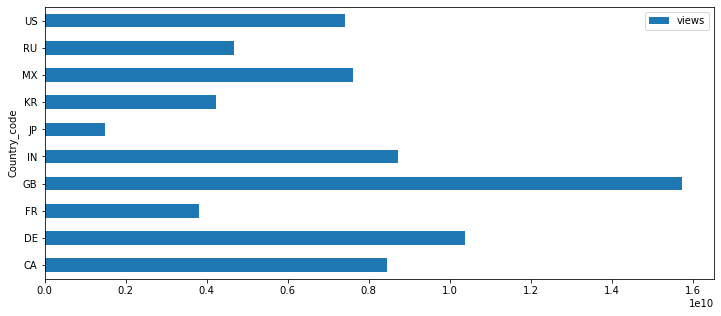

In [10]:
country_views.plot(kind='barh', figsize=(12,5));

# 1) Categorical differences in viewing patterns between Germans and Indians

## All countries

In [11]:
# Country / Category views
cc_views = pd.DataFrame(df.groupby(['Country_code', 'Category'])['views'].sum())
cc_views = cc_views.reset_index()
cc_views

,Country_code,Category,views
0,CA,Autos & Vehicles,90932335
1,CA,Comedy,714828501
2,CA,Education,176312770
3,CA,Entertainment,2886063673
4,CA,Film & Animation,379199556
...,...,...,...
161,US,Pets & Animals,87992711
162,US,Science & Technology,351702435
163,US,Shows,3049600
164,US,Sports,550606799


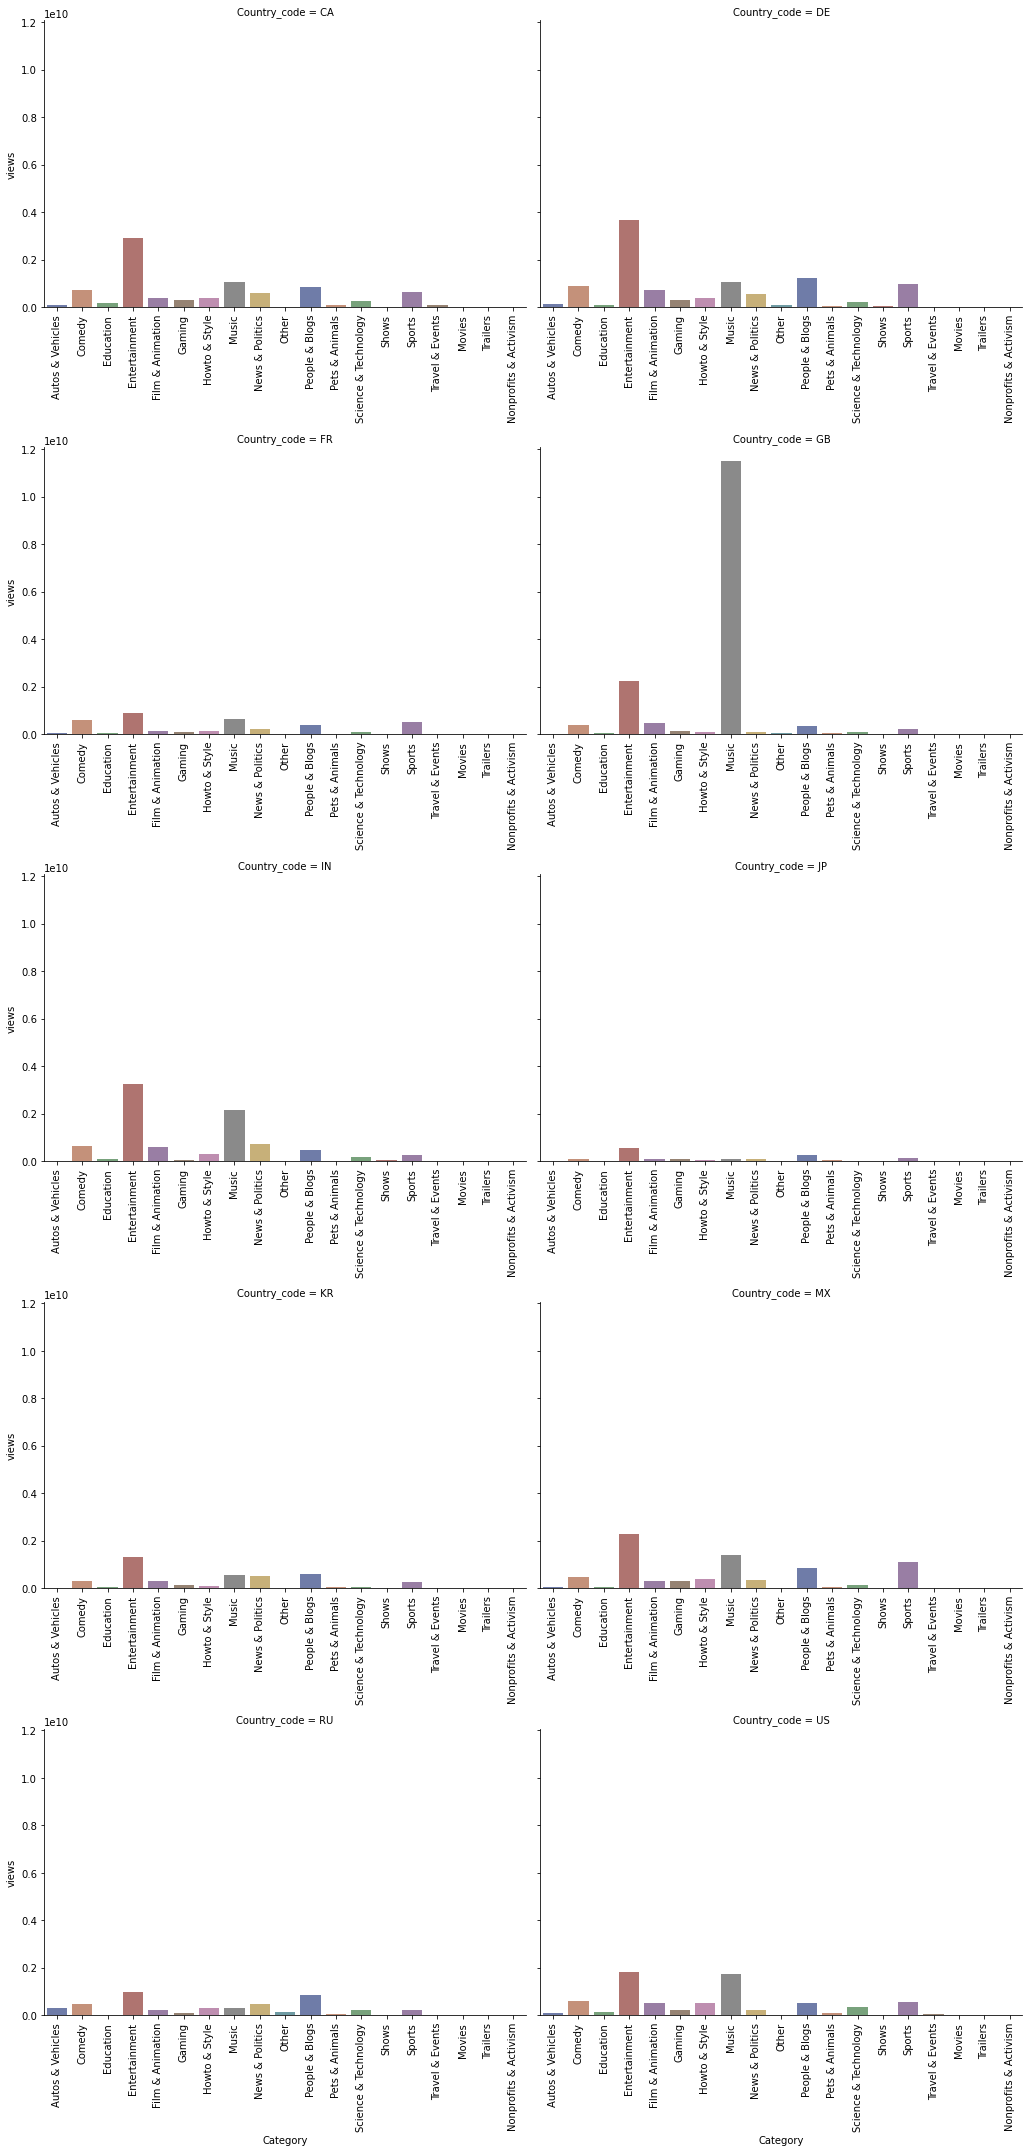

In [12]:
g = sns.catplot(data=cc_views, 
                x='Category', y='views', col='Country_code', kind='bar',
                palette='dark', alpha=.6, col_wrap=2, height=6, aspect=1.2,
                )
g.set_xticklabels(rotation=90)

# axis titles for every sub plot
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
# shrink sub plots
g.fig.tight_layout();

## Germany vs India

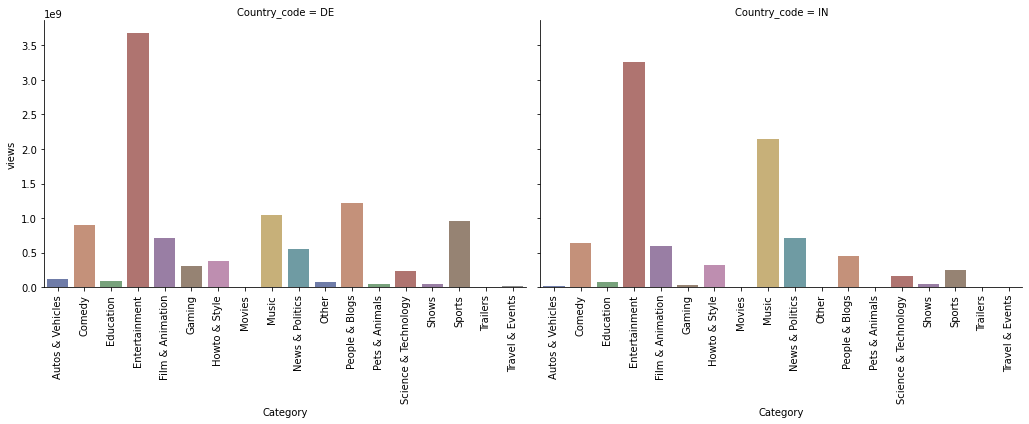

In [13]:
g = sns.catplot(data=cc_views[cc_views['Country_code'].isin(['DE', 'IN'])], 
                x='Category', y='views', col='Country_code', kind='bar',
                palette='dark', alpha=.6, col_wrap=2, height=6, aspect=1.2,
                )
g.set_xticklabels(rotation=90)

# axis titles for every sub plot
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
# shrink sub plots
g.fig.tight_layout();

In [14]:
categories = df["Category"].unique()
categories

array(['News & Politics', 'Entertainment', 'People & Blogs', 'Music',
       'Howto & Style', 'Sports', 'Comedy', 'Film & Animation',
       'Autos & Vehicles', 'Gaming', 'Science & Technology', 'Education',
       'Pets & Animals', 'Travel & Events', 'Other', 'Shows', 'Trailers',
       'Movies', 'Nonprofits & Activism'], dtype=object)

In [15]:
cc_views = pd.DataFrame(df.groupby(['Country_code', 'Category'])['views'].sum())
cc_views = cc_views.reset_index().set_index('Category')
de_views = cc_views[cc_views['Country_code'].isin(['DE'])].to_dict()
de_views = de_views.get('views')
de_views

{'Autos & Vehicles': 124577003,
 'Comedy': 906046068,
 'Education': 89415168,
 'Entertainment': 3678019697,
 'Film & Animation': 714495557,
 'Gaming': 302385219,
 'Howto & Style': 372639864,
 'Movies': 2289027,
 'Music': 1049418278,
 'News & Politics': 550871552,
 'Other': 73991022,
 'People & Blogs': 1221952758,
 'Pets & Animals': 46731311,
 'Science & Technology': 228127590,
 'Shows': 49046271,
 'Sports': 951360974,
 'Trailers': 8804,
 'Travel & Events': 14389115}

In [16]:
cc_views = pd.DataFrame(df.groupby(['Country_code', 'Category'])['views'].sum())
cc_views = cc_views.reset_index().set_index('Category')
in_views = cc_views[cc_views['Country_code'].isin(['IN'])].to_dict()
in_views = in_views.get('views')
in_views

{'Autos & Vehicles': 10101485,
 'Comedy': 635479724,
 'Education': 73816757,
 'Entertainment': 3263974582,
 'Film & Animation': 598577266,
 'Gaming': 30866539,
 'Howto & Style': 316488968,
 'Movies': 7724380,
 'Music': 2144812797,
 'News & Politics': 718354182,
 'Other': 3929208,
 'People & Blogs': 450882456,
 'Pets & Animals': 2490776,
 'Science & Technology': 158783387,
 'Shows': 51710586,
 'Sports': 245340014,
 'Travel & Events': 771631}

**Difference in absolute numbers.**

In [17]:
categories_count_dict_diff = {}
for category in categories:
    if de_views.get(category) and in_views.get(category):
        categories_count_dict_diff[category] = de_views[category] - in_views[category]
    elif de_views.get(category) and not in_views.get(category):
        categories_count_dict_diff[category] = de_views[category]
    elif not de_views.get(category) and in_views.get(category):
        categories_count_dict_diff[category] = - in_views[category]
    else:
        categories_count_dict_diff[category] = 0
        

categories_count_dict_diff = dict(sorted(categories_count_dict_diff.items(),
                                         key=lambda item: abs(item[1])))
categories_count_dict_diff

{'Nonprofits & Activism': 0,
 'Trailers': 8804,
 'Shows': -2664315,
 'Movies': -5435353,
 'Travel & Events': 13617484,
 'Education': 15598411,
 'Pets & Animals': 44240535,
 'Howto & Style': 56150896,
 'Science & Technology': 69344203,
 'Other': 70061814,
 'Autos & Vehicles': 114475518,
 'Film & Animation': 115918291,
 'News & Politics': -167482630,
 'Comedy': 270566344,
 'Gaming': 271518680,
 'Entertainment': 414045115,
 'Sports': 706020960,
 'People & Blogs': 771070302,
 'Music': -1095394519}

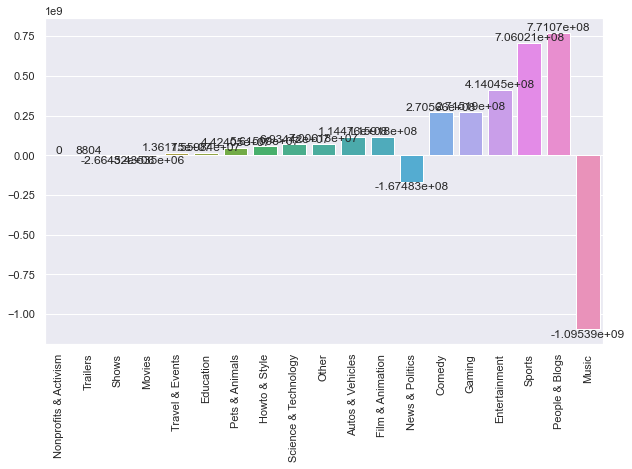

In [18]:
sns.set(rc={'figure.figsize':(10, 6)})
ax = sns.barplot(x=list(categories_count_dict_diff.keys()), 
            y=list(categories_count_dict_diff.values())
           );
plt.xticks(rotation=90);
for i in ax.containers:
    ax.bar_label(i,)

In [19]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [20]:
df_diff = pd.DataFrame(in_views, index=[0])
df_diff = pd.concat([df_diff, pd.DataFrame(de_views, index=[1])])
df_diff = df_diff.T.rename({0: 'IN', 1: 'DE'}, axis='columns')
df_diff = df_diff.reset_index().rename({'index': 'Category'}, axis='columns')
df_diff.sort_values(by='IN', inplace=True)
df_diff['ratio IN / DE'] = df_diff['IN'] / df_diff['DE']
df_diff['ratio DE / IN'] = df_diff['DE'] / df_diff['IN']

df_diff

,Category,IN,DE,ratio IN / DE,ratio DE / IN
16,Travel & Events,771631.0,14389115.0,0.1,18.6
12,Pets & Animals,2490776.0,46731311.0,0.1,18.8
10,Other,3929208.0,73991022.0,0.1,18.8
7,Movies,7724380.0,2289027.0,3.4,0.3
0,Autos & Vehicles,10101485.0,124577003.0,0.1,12.3
5,Gaming,30866539.0,302385219.0,0.1,9.8
14,Shows,51710586.0,49046271.0,1.1,0.9
2,Education,73816757.0,89415168.0,0.8,1.2
13,Science & Technology,158783387.0,228127590.0,0.7,1.4
15,Sports,245340014.0,951360974.0,0.3,3.9


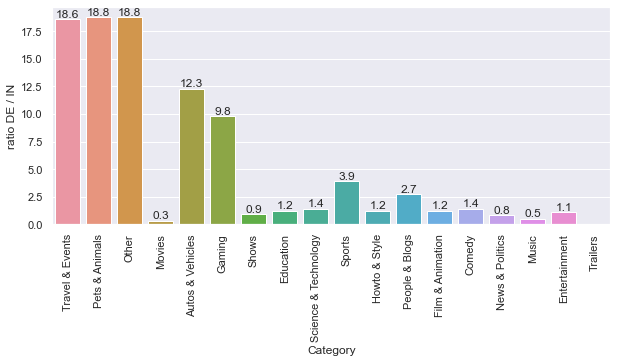

In [21]:
sns.set(rc={'figure.figsize':(10, 4)})
ax = sns.barplot(x=df_diff['Category'], 
            y=round(df_diff['ratio DE / IN'], 1)
           );
plt.xticks(rotation=90);
for i in ax.containers:
    ax.bar_label(i,)

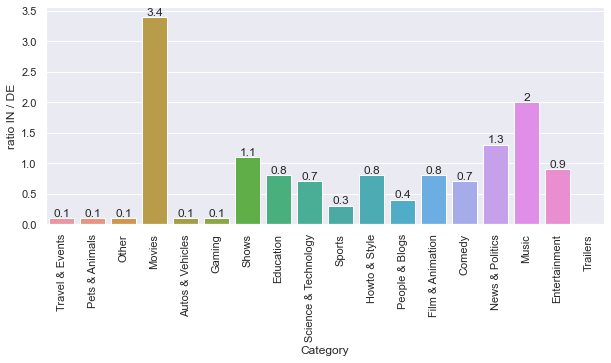

In [22]:
sns.set(rc={'figure.figsize':(10, 4)})
ax = sns.barplot(x=df_diff['Category'], 
            y=round(df_diff['ratio IN / DE'], 1)
           );
plt.xticks(rotation=90);
for i in ax.containers:
    ax.bar_label(i,)

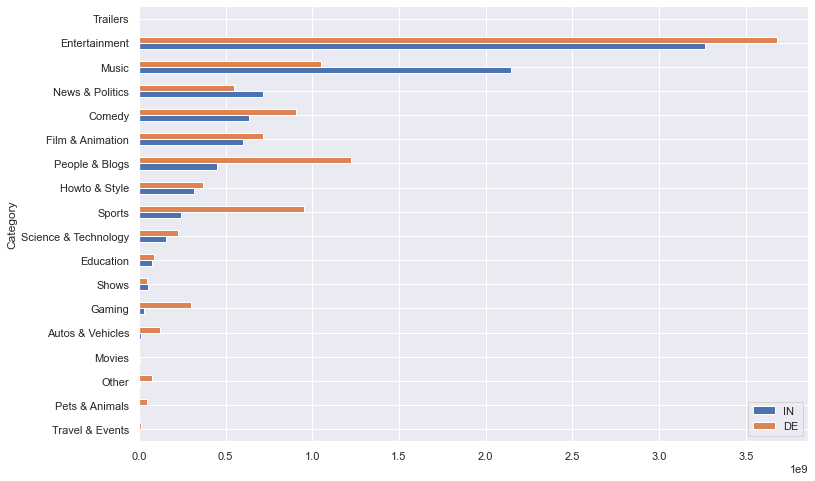

In [23]:
df_diff[['Category', 'IN', 'DE']].plot(kind='barh', x='Category', figsize=(12,8));

**Answer**:

According to the analysis of the behaviours of Indians and German people, there are a lot of differences. It could be found out by distribution and difference in absolute and percentage ratios. Also, it should take into account how many likes has the category.
- The biggest difference is in the categories `Music`, `People & Blogs` and `Sport`. These categories have big enough weight and can be classified as remarkable. 
`Music` is the top category with the biggest difference. Indians trending videos have more views at 2 times with a delta of 1,1 billion views.
The second difference is the category `People & Blogs` with a difference of 771 million views.
The third is `Sport` - the difference is 706 million views
- Other categories have fewer likes or in other words less weight. But some categories seem to be interesting. For example, `Gaming` by 9.8 times more popular in Germany than in India. `Autos & Vehicles` by 12.3 times.
- ` Travel & Events`, `Pets & Animals` and `Other` are the least trendy categories with the biggest differences. They differ by almost 19 times each between Germans and Indians.
- `Autos & Vehicles` is higher by 11.5 times. 
- Indians and Germans show similar behaviour in categories: `Howto & Style`, `Education` and `Shows`.

# 2) Ratios between views / likes / dislikes for different categories / countries. It seems to me that the Mexicans like all videos and the British are unhappy again. Is it easier for musicians to collect likes than for politicians?

### Aggregation by countries

In [24]:
df_agg = df.groupby(by='Country_code').sum()
# scaling
df_agg['likes / views ratio'] = df_agg['likes'] / df_agg['views']
df_agg['dislikes / views ratio'] = df_agg['dislikes'] / df_agg['views']
df_agg['likes / dislike ratio (norm.)'] = df_agg['likes / views ratio'] / df_agg['dislikes / views ratio']
df_agg['comment / views ratio'] = df_agg['comment_count'] / df_agg['views']
df_agg = df_agg.drop(['category_id', 'video_error_or_removed', 
                      'comments_disabled', 'ratings_disabled'], axis=1)
df_agg.style.background_gradient(cmap='Blues')

,views,likes,dislikes,comment_count,count,likes / views ratio,dislikes / views ratio,likes / dislike ratio (norm.),comment / views ratio
Country_code,,,,,,,,,
CA,8454207055,240742312,11035194,38380629,25435,0.028476,0.001305,21.815866,0.004540
DE,10375765278,318213255,22753065,43304090,38314,0.030669,0.002193,13.985512,0.004174
FR,3815856250,144629292,6216861,14276786,35217,0.037902,0.001629,23.264038,0.003741
GB,15733754312,326569257,19249037,32822421,38742,0.020756,0.001223,16.965485,0.002086
IN,8714104738,167566905,11378866,17064169,30623,0.019229,0.001306,14.726152,0.001958
JP,1491455904,24094785,2090506,4480371,13514,0.016155,0.001402,11.525815,0.003004
KR,4235934047,80943955,3210196,15450063,31307,0.019109,0.000758,25.214646,0.003647
MX,7606020194,332676612,14137134,43426302,39646,0.043739,0.001859,23.532111,0.005709
RU,4662265694,231969764,33869039,34910238,37600,0.049755,0.007265,6.849021,0.007488


**Answer**

The plot with colour fill shows that Russia has the highest ratio of likes, dislikes and comments to views. So, Russia is the most involved country. On the other side, there is Japan with the lowest likes/views ratio and India with the lowest comment/views ratio. It seems to me that it is wrong to consider Great Britain as an unhappy country. It looks like GB is one of the not involved countries. British does not like to press a button ‘like’, ‘dislike’ and write comments. But they are not in the first position of not being involved countries.

Mexicans are in the second position with the second likes/views ratio after Russia. But considering likes/dislikes ratio Mexicans are in the second position after Korea. Koreans seem to have the highest likes/dislikes ratio.

### Aggregation by category and country

In [25]:
df_agg_cc = df.groupby(by=['Category', 'Country_code',]).sum()
# scaling
df_agg_cc['comment / views ratio'] = df_agg_cc['comment_count'] / df_agg_cc['views']
df_agg_cc['likes / views ratio'] = df_agg_cc['likes'] / df_agg_cc['views']
df_agg_cc['dislikes / views ratio'] = df_agg_cc['dislikes'] / df_agg_cc['views']
df_agg_cc = df_agg_cc.drop(['category_id', 'comments_disabled', 'ratings_disabled',
                            'video_error_or_removed'], axis=1)
df_agg_cc.head(12)

views     likes  dislikes  comment_count  \
Category         Country_code                                                 
Autos & Vehicles CA             90932335   3025916     93770         621392   
                 DE            124577003   4183316    131511         462629   
                 FR             25669211   1060823     35181         146204   
                 GB             20406847    349318     24374          42966   
                 IN             10101485    138149      8353          26945   
                 JP             12639665    132700     12011          30068   
                 KR              6781807     77524      6553          20743   
                 MX             29804091   1650604     45431         208827   
                 RU            282002670  14893009   1066289        1624911   
                 US             88848156    534171     29206          90612   
Comedy           CA            714828501  32271884    839958        3898744   
                 DE            906046068  38534761   1409152        4831626   

                               count  comment / views ratio  \
Category         Country_code                                 
Autos & Vehicles CA              305                    0.0   
                 DE              866                    0.0   
                 FR              664                    0.0   
                 GB              144                    0.0   
                 IN               70                    0.0   
                 JP              224                    0.0   
                 KR              113                    0.0   
                 MX              247                    0.0   
                 RU             1561                    0.0   
                 US              345                    0.0   
Comedy           CA             1936                    0.0   
                 DE             2303                    0.0   

                               likes / views ratio  dislikes / views ratio  
Category         Country_code                                               
Autos & Vehicles CA                            0.0                     0.0  
                 DE                            0.0                     0.0  
                 FR                            0.0                     0.0  
                 GB                            0.0                     0.0  
                 IN                            0.0                     0.0  
                 JP                            0.0                     0.0  
                 KR                            0.0                     0.0  
                 MX                            0.1                     0.0  
                 RU                            0.1                     0.0  
                 US                            0.0                     0.0  
Comedy           CA                            0.0                     0.0  
                 DE                            0.0                     0.0

In [26]:
df_agg_cc = df.groupby(by=['Category', 'Country_code',]).sum()
# scaling
df_agg_cc['comment / views ratio'] = df_agg_cc['comment_count'] / df_agg_cc['views']
df_agg_cc['likes / views ratio'] = df_agg_cc['likes'] / df_agg_cc['views']
df_agg_cc['dislikes / views ratio'] = df_agg_cc['dislikes'] / df_agg_cc['views']
df_agg_cc = df_agg_cc.drop(['category_id', 'comments_disabled', 'ratings_disabled',
                            'video_error_or_removed'], axis=1)
df_agg_cc.head(12)

views     likes  dislikes  comment_count  \
Category         Country_code                                                 
Autos & Vehicles CA             90932335   3025916     93770         621392   
                 DE            124577003   4183316    131511         462629   
                 FR             25669211   1060823     35181         146204   
                 GB             20406847    349318     24374          42966   
                 IN             10101485    138149      8353          26945   
                 JP             12639665    132700     12011          30068   
                 KR              6781807     77524      6553          20743   
                 MX             29804091   1650604     45431         208827   
                 RU            282002670  14893009   1066289        1624911   
                 US             88848156    534171     29206          90612   
Comedy           CA            714828501  32271884    839958        3898744   
                 DE            906046068  38534761   1409152        4831626   

                               count  comment / views ratio  \
Category         Country_code                                 
Autos & Vehicles CA              305                    0.0   
                 DE              866                    0.0   
                 FR              664                    0.0   
                 GB              144                    0.0   
                 IN               70                    0.0   
                 JP              224                    0.0   
                 KR              113                    0.0   
                 MX              247                    0.0   
                 RU             1561                    0.0   
                 US              345                    0.0   
Comedy           CA             1936                    0.0   
                 DE             2303                    0.0   

                               likes / views ratio  dislikes / views ratio  
Category         Country_code                                               
Autos & Vehicles CA                            0.0                     0.0  
                 DE                            0.0                     0.0  
                 FR                            0.0                     0.0  
                 GB                            0.0                     0.0  
                 IN                            0.0                     0.0  
                 JP                            0.0                     0.0  
                 KR                            0.0                     0.0  
                 MX                            0.1                     0.0  
                 RU                            0.1                     0.0  
                 US                            0.0                     0.0  
Comedy           CA                            0.0                     0.0  
                 DE                            0.0                     0.0

#### Likes distribution

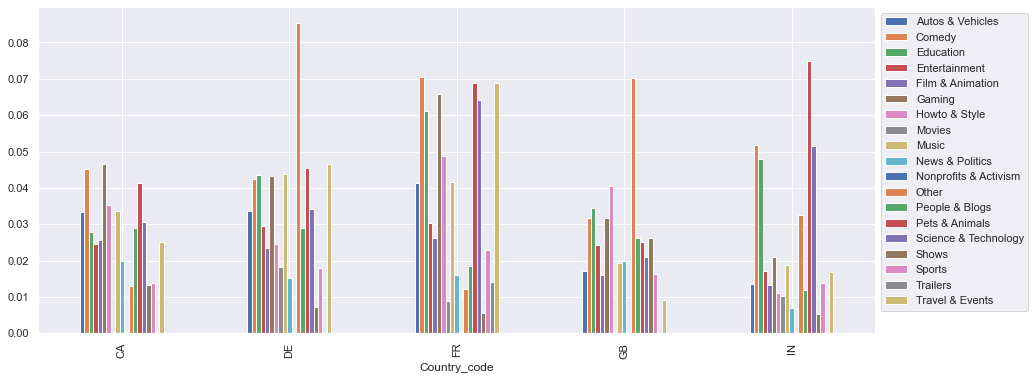

In [27]:
ax = df_agg_cc['likes / views ratio'].unstack(level=0)[:5].plot(kind='bar', 
                                                    subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

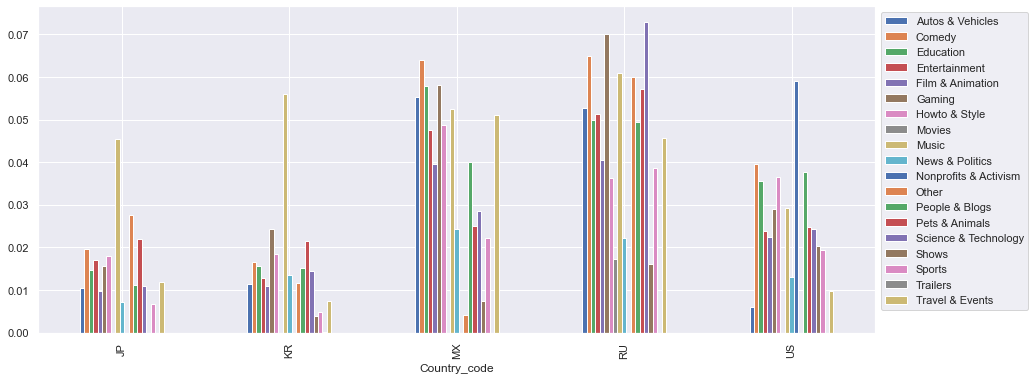

In [28]:
ax = df_agg_cc['likes / views ratio'].unstack(level=0)[5:].plot(kind='bar', 
                                                    subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

#### Dislikes distribution

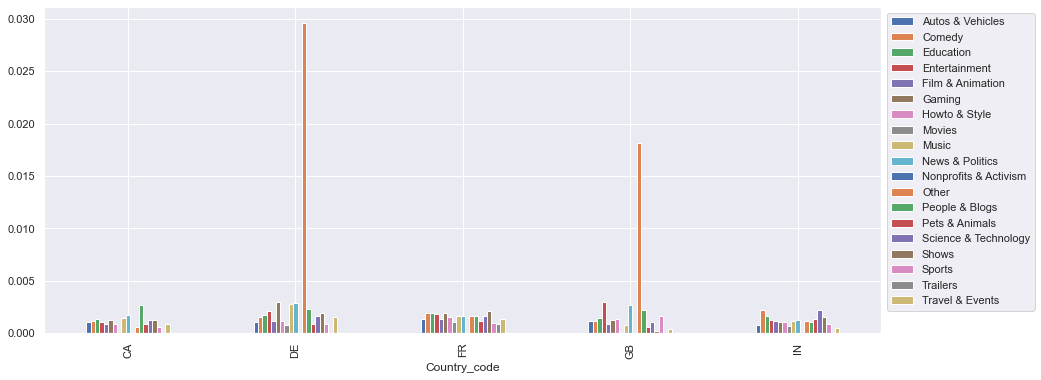

In [29]:
ax = df_agg_cc['dislikes / views ratio'].unstack(level=0)[:5].plot(kind='bar', 
                                                        subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

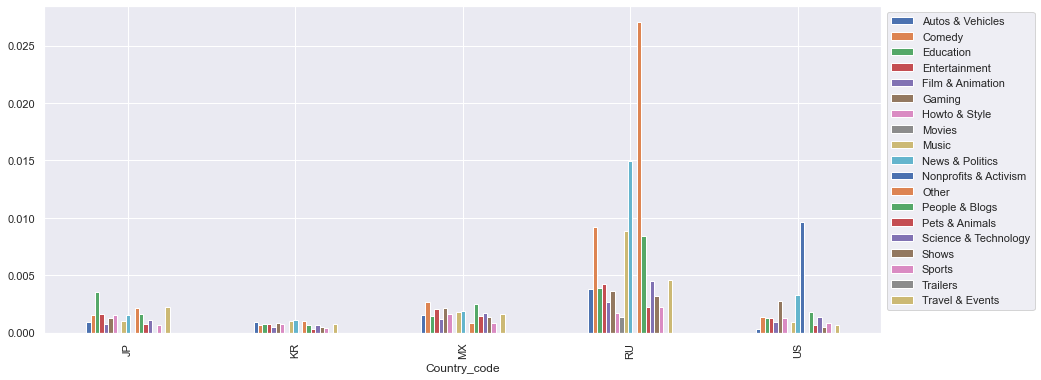

In [30]:
ax = df_agg_cc['dislikes / views ratio'].unstack(level=0)[5:].plot(kind='bar', 
                                                        subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

### Aggregation by country and category

In [31]:
df_agg_cc = df.groupby(by=['Country_code', 'Category']).sum()
# scaling
df_agg_cc['comment / views ratio'] = df_agg_cc['comment_count'] / df_agg_cc['views']
df_agg_cc['likes / views ratio'] = df_agg_cc['likes'] / df_agg_cc['views']
df_agg_cc['dislikes / views ratio'] = df_agg_cc['dislikes'] / df_agg_cc['views']
df_agg_cc = df_agg_cc.drop(['category_id', 'comments_disabled', 'ratings_disabled',
                            'video_error_or_removed'], axis=1)
df_agg_cc.head(20)

views      likes  dislikes  \
Country_code Category                                                
CA           Autos & Vehicles        90932335    3025916     93770   
             Comedy                 714828501   32271884    839958   
             Education              176312770    4887734    247158   
             Entertainment         2886063673   71180636   3190145   
             Film & Animation       379199556    9779829    331418   
             Gaming                 282045100   13116887    344994   
             Howto & Style          393582822   13833723    339766   
             Music                 1060573820   35713296   1539035   
             News & Politics        600832835   11871200   1026072   
             Other                    6474311      83951      4053   
             People & Blogs         832257928   23991360   2236953   
             Pets & Animals          72019949    2985169     60868   
             Science & Technology   243581776    7453479    311551   
             Shows                    8876357     116711     11346   
             Sports                 641987236    8803227    399801   
             Travel & Events         64638086    1627310     58306   
DE           Autos & Vehicles       124577003    4183316    131511   
             Comedy                 906046068   38534761   1409152   
             Education               89415168    3889798    153010   
             Entertainment         3678019697  108558744   7930195   

                                   comment_count  count  \
Country_code Category                                     
CA           Autos & Vehicles             621392    305   
             Comedy                      3898744   1936   
             Education                    897655    698   
             Entertainment              11353150   8484   
             Film & Animation            1367032   1065   
             Gaming                      2347170    927   
             Howto & Style               2782713   1288   
             Music                       3559463   1414   
             News & Politics             3797731   3364   
             Other                         20244     55   
             People & Blogs              3830512   2884   
             Pets & Animals               622196    257   
             Science & Technology        1286197    561   
             Shows                         11905     24   
             Sports                      1727423   1862   
             Travel & Events              257102    311   
DE           Autos & Vehicles             462629    866   
             Comedy                      4831626   2303   
             Education                    514418    833   
             Entertainment              14692884  14604   

                                   comment / views ratio  likes / views ratio  \
Country_code Category                                                           
CA           Autos & Vehicles                        0.0                  0.0   
             Comedy                                  0.0                  0.0   
             Education                               0.0                  0.0   
             Entertainment                           0.0                  0.0   
             Film & Animation                        0.0                  0.0   
             Gaming                                  0.0                  0.0   
             Howto & Style                           0.0                  0.0   
             Music                                   0.0                  0.0   
             News & Politics                         0.0                  0.0   
             Other                                   0.0                  0.0   
             People & Blogs                          0.0                  0.0   
             Pets & Animals                          0.0                  0.0   
             Science & Technology                    0.0          

#### Likes / views ratio

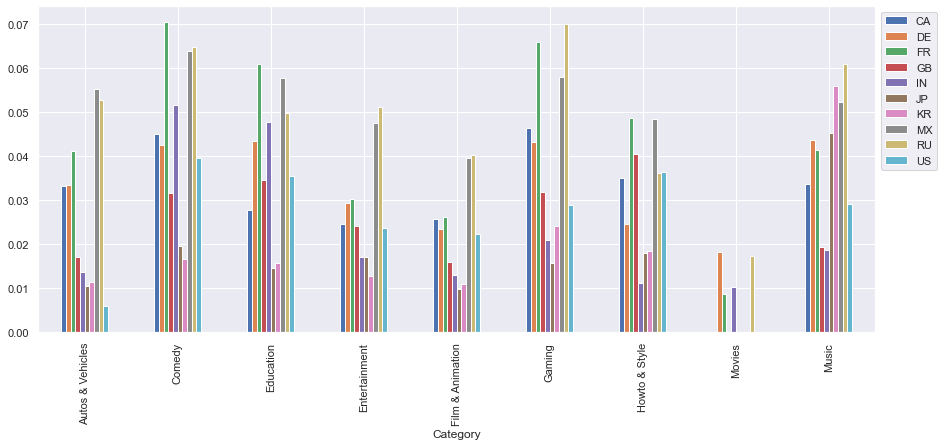

In [32]:
ax = df_agg_cc['likes / views ratio'].unstack(level=0)[:9].plot(kind='bar', 
                                                    subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

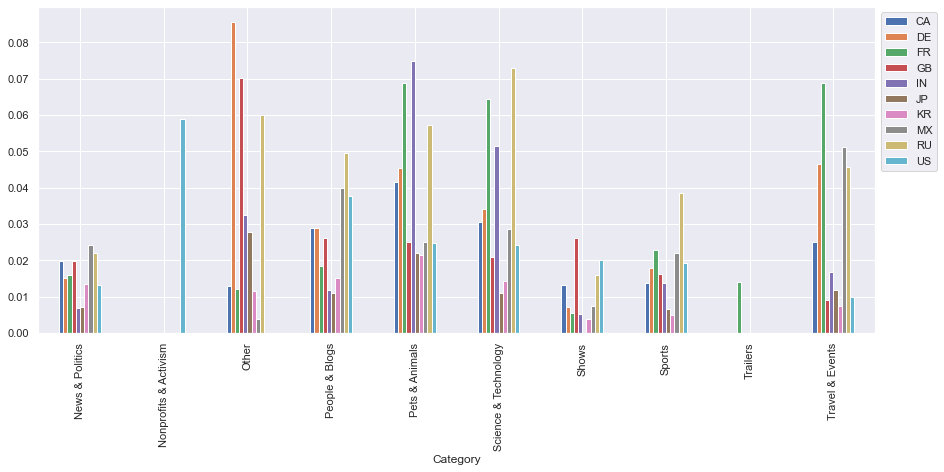

In [33]:
ax = df_agg_cc['likes / views ratio'].unstack(level=0)[9:].plot(kind='bar', 
                                                    subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

#### Dislike distribution

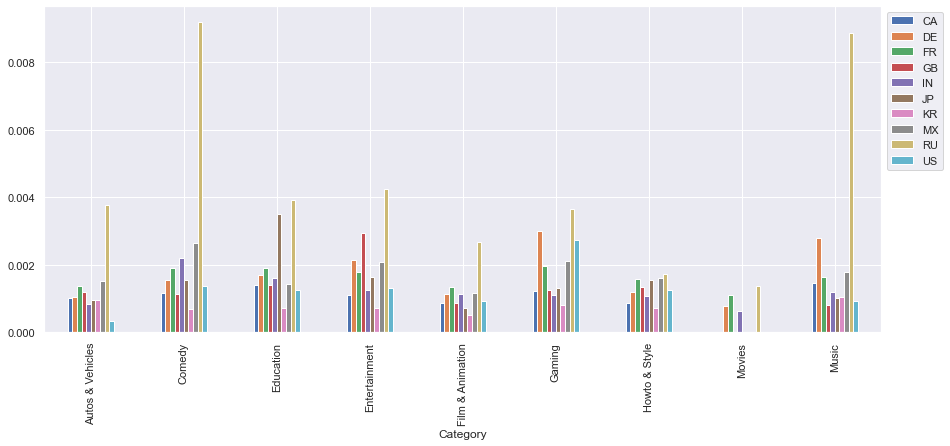

In [34]:
ax = df_agg_cc['dislikes / views ratio'].unstack(level=0)[:9].plot(kind='bar', 
                                                        subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

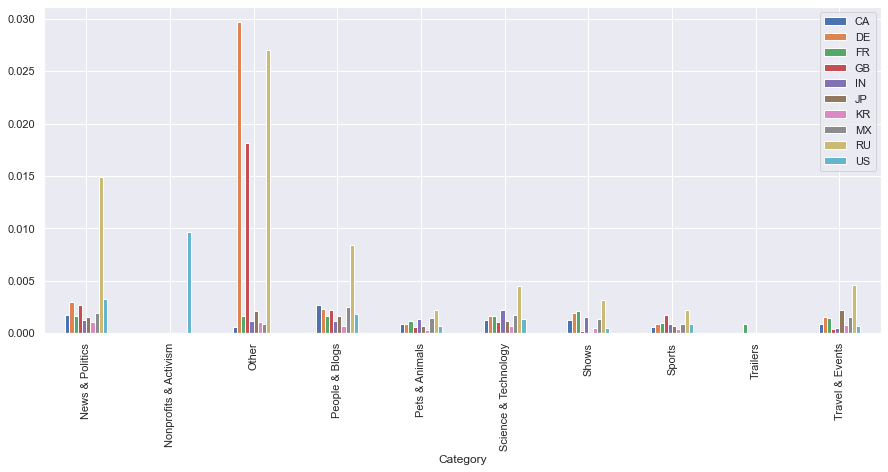

In [35]:
ax = df_agg_cc['dislikes / views ratio'].unstack(level=0)[9:].plot(kind='bar', 
                                                        subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

**Likes distribution shows that**:
- `Other` category is the most popular for about a half countries.
- Category `Movies` is absent in trends in CA, GB, JP, KR, MX and US.
- `Nonprofits & Activism` is in trending video in US only but no `Movie`, `Other` and `Trailers` categories. 
- `Trailers` is in France only.
- Japan has not `Shows`


**Dislikes distribution shows that**:
- `Other` category has the highest dislike ratio for DE, GB, RU.
- Russia is very involved in `News & Politics`.
- US has the top dislike category `Nonprofit & activism` because US only has the trending videos in this category.
- It seems that Russia is the country with the highest dislike ratio. RU has the most disliked among other countries in categories: `Comedy`, `Music`, `News & Politics`, `Other`, `People & Blogs`.


## Is it easier for musicians to collect likes than for politicians?

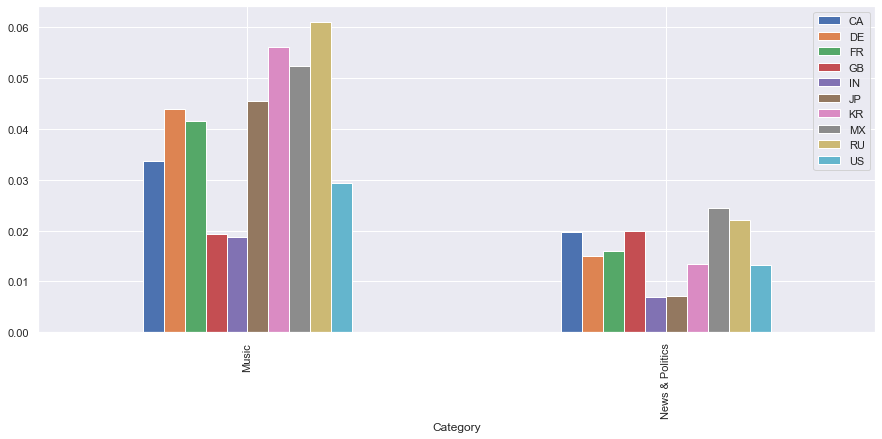

In [36]:
ax = df_agg_cc[np.in1d(df_agg_cc.index.get_level_values(1), 
    ['Music', 'News & Politics'])]['likes / views ratio'].unstack(level=0)[:9].plot(kind='bar',
                                                                subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

**Answer**

**Yes, it is easier for musicians to collect likes than for politicians. `Music` category has more likes than `News & Politics` for all countries except Great Britain. GB has more likes/views ratio in `News & Politics` than in `Music` category.**

## 3) Сhannels that are popular in most countries. Ed Sheeran, hello.

### Сhannels that are popular in total

In [37]:
df_agg_pop = df_.groupby(by='channel_title').sum()
df_agg_pop = df_agg_pop.drop(['category_id', 'comments_disabled', 'ratings_disabled',
                            'video_error_or_removed'], axis=1)
df_agg_pop.sort_values(by='views', ascending=False).head(10)

,views,likes,dislikes,comment_count
channel_title,,,,
NickyJamTV,8577106931,67996269,3928688,3208216
Ozuna,8375001913,73892790,4845507,3114128
Bad Bunny,6955244102,110539795,5424756,6400517
DrakeVEVO,6661235687,154291037,3488475,9645234
ChildishGambinoVEVO,5987062002,145207885,9375467,15106259
Flow La Movie,5151438858,53517444,2801757,2003208
ArianaGrandeVevo,4157118988,100717808,4002865,8090310
Marvel Entertainment,4088060012,104580593,2288788,11856834
jypentertainment,3869694887,105816323,5807579,16939740


**Answer**

**`Ed Sheeran` with 3.7 billion trending views at 10-the position, whereas ` NickyJamTV` has 8.6 billion.**

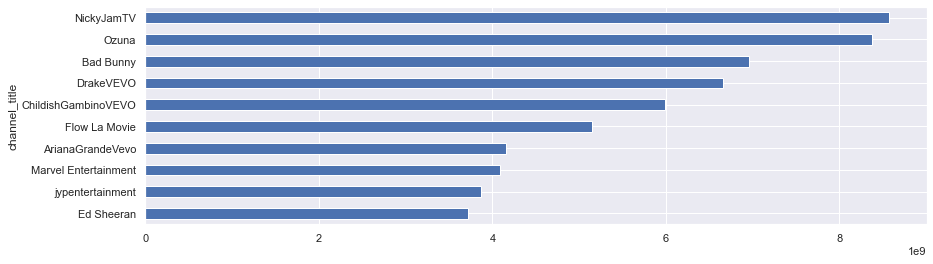

In [38]:
ax = df_agg_pop.sort_values(by='views', ascending=False)['views'][:10][::-1].plot(kind='barh',
                                                        subplots=False, figsize=(14,4));

**If popularity is measured by other metrics, the distribution is slightly different, but `by likes` Ed Sheeran is again at the 10-th place.**

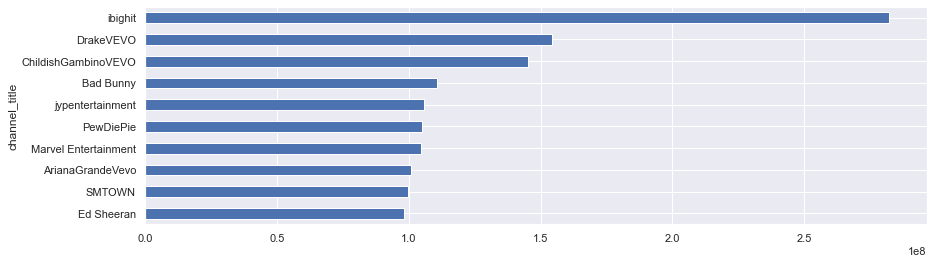

In [39]:
ax = df_agg_pop.sort_values(by='likes', ascending=False)['likes'][:10][::-1].plot(kind='barh',
                                                        subplots=False, figsize=(14,4));

**The `Likes + dislike` measure provides similar results.**

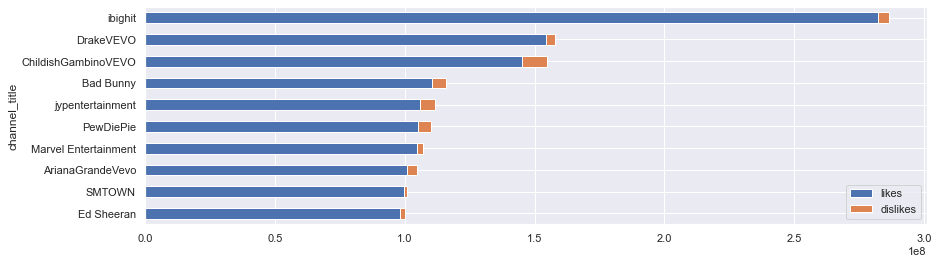

In [40]:
ax = df_agg_pop.sort_values(by='likes', ascending=False)[['likes', 'dislikes']][:10][::-1].plot(kind='barh',
                                                        subplots=False, figsize=(14,4), stacked=True);

**By `comment_count` he is at 25-th place.**

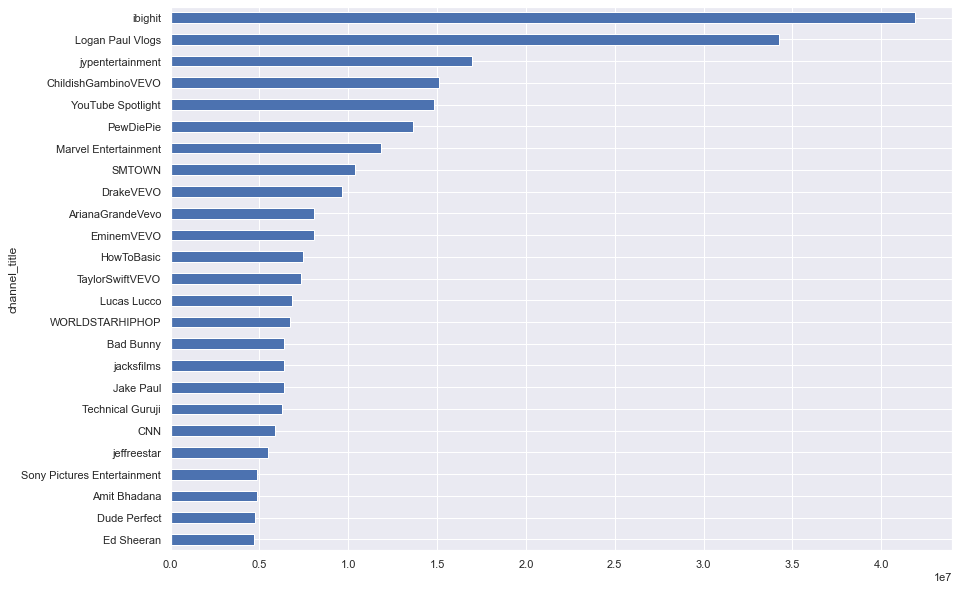

In [41]:
ax = df_agg_pop.sort_values(by='comment_count', 
                ascending=False)['comment_count'][:25][::-1].plot(kind='barh',
                                                    subplots=False, figsize=(14,10));

**This notebook is also avalable by the link**: https://github.com/alex-kalinichenko/misc/blob/master/youtube_trending/youtube_trending_3.ipynb